## NIOSH - Data Science for Everyone Workshop - Accidents Data Case Study (Python)

Created by Leonid Shpaner for use in **NIOSH - Data Science for Everyone Workshop.** The dataset
originates for Data Mining from Business Analytics (Shmueli et., 2018). The functions and syntax are presented in the most basic format to facilitate ease of use.  

The Accidents dataset is presented as a flat `.csv` file which is comprised of 42,183 recorded automobile
accidents from 2001 in the United States. The following three outcomes are observed: “NO INJURY,
INJURY, or FATALITY.” Each accident is supplemented with additional information (i.e., day of the week,
condition of weather, and road type). This may be of interest to an organization looking to develop “a
system for quickly classifying the severity of an accident based on initial reports and associated data in the
system (some of which rely on GPS-assisted reporting)” (Shmueli et al., 2018, p. 202).

## Loading, Pre-Processing, and Exploring Data

Let's make sure the dataset is in the same path as our Python script. If you save the
data somewhere else, you need to pass in the full path to where you saved the dataset,  e.g. `dataset = pd.read_csv('C:/Downloads/dataset.csv')`.

Let's install the necessary libraries first, uncommenting (removing the `#` symbol) in front of the commands in the cell blocks, and then running them, respectively.

In [1]:
# pip install pandas; pip install statsmodels; pip install sklearn

In [2]:
# pip install pydotplus; pip install prettytable

Now, let's load these necessary libraries as follows:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, mean_squared_error,\
precision_score, recall_score, f1_score, accuracy_score,\
confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

Now, we proceed to read in the flat `.csv` file, and examine the first 4 rows of data.

In [4]:
url = 'https://raw.githubusercontent.com/lshpaner/data_science_\
for_everyone/main/Case%20Study/accidentsFull.csv'
accidents = pd.read_csv(url)

Now let's inspect the dataset.

In [5]:
accidents.head(4)

HOUR_I_R  ALCHL_I  ALIGN_I  STRATUM_R  WRK_ZONE  WKDY_I_R  INT_HWY  \
0         0        2        2          1         0         1        0   
1         1        2        1          0         0         1        1   
2         1        2        1          0         0         1        0   
3         1        2        1          1         0         0        0   

   LGTCON_I_R  MANCOL_I_R  PED_ACC_R  ...  SUR_COND  TRAF_CON_R  TRAF_WAY  \
0           3           0          0  ...         4           0         3   
1           3           2          0  ...         4           0         3   
2           3           2          0  ...         4           1         2   
3           3           2          0  ...         4           1         2   

   VEH_INVL  WEATHER_R  INJURY_CRASH  NO_INJ_I  PRPTYDMG_CRASH  FATALITIES  \
0         1          1             1         1               0           0   
1         2          2             0         0               1           0   
2         2          2             0         0               1           0   
3         2          1             0         0               1           0   

   MAX_SEV_IR  
0           1  
1           0  
2           0  
3           0  

[4 rows x 24 columns]

## Data Dictionary
Prior to delving deeper, let us first identify (describe) what each respective variable name really means. To
this end, we have the following data dictionary:  

1. **HOUR_I_R** - rush hour classification: 1 = rush hour, 0 = not rush hour (rush hour = 6-9 am, or 4-7
pm)  
2. **ALCHL_I** - alcohol involvement: Alcohol involved = 1, alcohol not involved = 2  
3. **ALIGN_I** - road alignment: 1 = straight, 2 = curve  
4. **STRATUM_R** - National Automotive Sampling System stratum: 1 = NASS Crashes involving at least one
passenger vehicle (i.e., a passenger car, sport utility Vehicle, pickup truck or van) towed due to damage
from the crash scene and no medium or heavy trucks are involved. 0 = not  
5. **WRK_ZONE** - work zone: 1= yes, 0 = no  
6. **WKDY_I_R** - weekday or weekend: 1 = weekday, 0 = weekend  
7. **INT_HWY** - interstate highway: 1 =yes, 0 = no  
8. **LGTCON_I_R** - light conditions - 1=day, 2=dark (including dawn/dusk), 3 = dark, but lighted, 4 = dawn
or dusk  
9. **MANCOL_I** - type of collision: 0 = no collision, 1 = head-on, 2 = other form of collision  
10. **PED_ACC_R** - collision involvement type: 1=pedestrian/cyclist involved, 0=not  
11. **RELJCT_I_R** - whether the collision occurred at intersection: 1=accident at intersection/interchange,
0=not at intersection  
12. **REL_RWY_R** - related to roadway or not: 1 = accident on roadway, 0 = not on roadway  
13. **PROFIL_I_R** -  road profile: 1 = level, 0 = other  
14. **SPD_LIM** - speed limit, miles per hour: numeric  
15. **SUR_CON** - surface conditions (1 = dry, 2 = wet, 3 = snow/slush, 4 = ice, 5 = sand/dirt/oil, 8 = other,
9 = unknown)  
16. **TRAF_CON_R** - traffic control device: 0 = none, 1 = signal, 2 = other (sign, officer, . . . )  
17. **TRAF_WAY** - traffic type: 1 = two-way traffic, 2 = divided hwy, 3 = one-way road  
18. **VEH_INVL** - vehicle involvement: number of vehicles involved (numeric)  
19. **WEATHER_R** - weather conditions: 1=no adverse conditions, 2=rain, snow or other adverse condition  
20. **INJURY_CRASH** - injury crash: 1 = yes, 0 = no  
21. **NO_INJ_I** - number of injuries: numeric  
22. **PRPTYDMG_CRASH** - property damage: 1 = property damage, 2 = no property damage  
23. **FATALITIES** - fatalities: 1 = yes, 0 = no  
24. **MAX_SEV_IR** - maximum severity: 0 = no injury, 1 = non-fatal injury, 2 = fatal injury  

## Initial Pre-Processing Steps


Speed limit (`SPD_LIM`) has valuable numerical information, so let us go ahead and create buckets for this data.

In [6]:
unique_speed = accidents['SPD_LIM'].unique()
unique_speed.sort()
unique_speed = pd.DataFrame(unique_speed)
unique_speed.T

0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
0  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75

In [7]:
labels = [ "{0} - {1}".format(i, i + 5) for i in range(0, 100, 10) ]
accidents['MPH Range'] = pd.cut(accidents.SPD_LIM, range(0, 105, 10), 
                                right=False, 
                                labels=labels)
# inspect the new dataframe with this info
accidents[['SPD_LIM', 'MPH Range']]

SPD_LIM MPH Range
0           40   40 - 45
1           70   70 - 75
2           35   30 - 35
3           35   30 - 35
4           25   20 - 25
...        ...       ...
42178       45   40 - 45
42179       55   50 - 55
42180       55   50 - 55
42181       65   60 - 65
42182       70   70 - 75

[42183 rows x 2 columns]

In [8]:
accidents['MPH Range'] = accidents['SPD_LIM'].map({5:'5-10', 10:'5-10', 
                                                   15: '15-20', 20:'15-20',
                                                   25: '25-30', 30: '25-30',
                                                   35: '35-40', 40: '35-40',
                                                   45: '45-50', 50: '45-50',
                                                   55: '55-60', 60: '55-60',
                                                   65: '65-70', 70: '65-70',
                                                   75: '75'})
accidents['MPH Range']

0        35-40
1        65-70
2        35-40
3        35-40
4        25-30
         ...  
42178    45-50
42179    55-60
42180    55-60
42181    65-70
42182    65-70
Name: MPH Range, Length: 42183, dtype: object

Next, we create a dummy variable called `INJURY` to determine if the accident resulted in an injury based on maximum severity. So, if the severity of the injury is greater than zero, we specify `yes`. Otherwise, we specify `no`.

In [9]:
accidents['INJURY'] = np.where(accidents['MAX_SEV_IR'] > 0, 'yes', 'no')
accidents.head()

HOUR_I_R  ALCHL_I  ALIGN_I  STRATUM_R  WRK_ZONE  WKDY_I_R  INT_HWY  \
0         0        2        2          1         0         1        0   
1         1        2        1          0         0         1        1   
2         1        2        1          0         0         1        0   
3         1        2        1          1         0         0        0   
4         1        1        1          0         0         1        0   

   LGTCON_I_R  MANCOL_I_R  PED_ACC_R  ...  TRAF_WAY  VEH_INVL  WEATHER_R  \
0           3           0          0  ...         3         1          1   
1           3           2          0  ...         3         2          2   
2           3           2          0  ...         2         2          2   
3           3           2          0  ...         2         2          1   
4           3           2          0  ...         2         3          1   

   INJURY_CRASH  NO_INJ_I  PRPTYDMG_CRASH  FATALITIES  MAX_SEV_IR  MPH Range  \
0             1         1               0           0           1      35-40   
1             0         0               1           0           0      65-70   
2             0         0               1           0           0      35-40   
3             0         0               1           0           0      35-40   
4             0         0               1           0           0      25-30   

   INJURY  
0     yes  
1      no  
2      no  
3      no  
4      no  

[5 rows x 26 columns]

## Exploratory Data Analysis

Let us first examine the structure of this dataset so we can gather the details about the size, shape, and values of the dataframe holistically, and each column, respectively.

In [10]:
print('Number of Rows:', accidents.shape[0])
print('Number of Columns:', accidents.shape[1], '\n')

data_types = accidents.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.assign(Null_Values = 
                               accidents.isnull().sum())
data_types.reset_index(inplace = True)
data_types.rename(columns={0:'Data Type',
                          'index': 'Column/Variable',
                          'Null_Values': "# of Nulls"})

Number of Rows: 42183
Number of Columns: 26 



Column/Variable Data Type  # of Nulls
0         HOUR_I_R     int64           0
1          ALCHL_I     int64           0
2          ALIGN_I     int64           0
3        STRATUM_R     int64           0
4         WRK_ZONE     int64           0
5         WKDY_I_R     int64           0
6          INT_HWY     int64           0
7       LGTCON_I_R     int64           0
8       MANCOL_I_R     int64           0
9        PED_ACC_R     int64           0
10      RELJCT_I_R     int64           0
11       REL_RWY_R     int64           0
12      PROFIL_I_R     int64           0
13         SPD_LIM     int64           0
14        SUR_COND     int64           0
15      TRAF_CON_R     int64           0
16        TRAF_WAY     int64           0
17        VEH_INVL     int64           0
18       WEATHER_R     int64           0
19    INJURY_CRASH     int64           0
20        NO_INJ_I     int64           0
21  PRPTYDMG_CRASH     int64           0
22      FATALITIES     int64           0
23      MAX_SEV_IR     int64           0
24       MPH Range    object           0
25          INJURY    object           0

How many accidents resulted in injuries? We create a stylistic pandoc table from the `PrettyTable()` library to
inspect these results.

In [11]:
injury_yes = accidents['INJURY'].value_counts()['yes']
injury_no = accidents['INJURY'].value_counts()['no']
injury_total = injury_yes + injury_no

table1 = PrettyTable() # build a table
table1.field_names = ['Yes: Injured', 'No: Uninjured', 
                      'Total Injured']
table1.add_row([injury_yes, injury_no, injury_total])
print(table1)

+--------------+---------------+---------------+
| Yes: Injured | No: Uninjured | Total Injured |
+--------------+---------------+---------------+
|    21462     |     20721     |     42183     |
+--------------+---------------+---------------+


What percentage of accidents resulted in injuries?

In [12]:
perc_inj = injury_yes/(injury_yes + injury_no) 
print(round(perc_inj, 2)*100, '% of accidents'
                       ' resulted in injuries')

51.0 % of accidents resulted in injuries


A little more than half of the accidents resulted in injuries; thus, we should intrinsically focus our predictions in favor of injuries. However, predictive analytics requires more than merely a cursory glance at first tier probability results. Therefore, we cannot make any assumptions at face value. We will proceed to model this behavior later, but for now let us continue exploring the data.

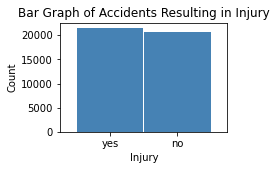

In [13]:
# accidents injury bar graph
injury_count = accidents['INJURY'].value_counts()
fig = plt.figure(figsize=(3,2))
injury_count.plot.bar(x ='lab', y='val', rot=0, width=0.99, 
                         color="steelblue")
plt.title ('Bar Graph of Accidents Resulting in Injury')
plt.xlabel('Injury') 
plt.ylabel('Count')
plt.show()

In [14]:
accidents.dtypes

HOUR_I_R           int64
ALCHL_I            int64
ALIGN_I            int64
STRATUM_R          int64
WRK_ZONE           int64
WKDY_I_R           int64
INT_HWY            int64
LGTCON_I_R         int64
MANCOL_I_R         int64
PED_ACC_R          int64
RELJCT_I_R         int64
REL_RWY_R          int64
PROFIL_I_R         int64
SPD_LIM            int64
SUR_COND           int64
TRAF_CON_R         int64
TRAF_WAY           int64
VEH_INVL           int64
WEATHER_R          int64
INJURY_CRASH       int64
NO_INJ_I           int64
PRPTYDMG_CRASH     int64
FATALITIES         int64
MAX_SEV_IR         int64
MPH Range         object
INJURY            object
dtype: object

In [15]:
print("\033[1m"+'Injury Outcomes by Miles per Hour'+"\033[1m")

def INJURY_by_MPH():

    INJURY_yes = accidents.loc[accidents.INJURY == 'yes'].groupby(
                               ['MPH Range'])[['INJURY']].count()
    
    INJURY_yes.rename(columns = {'INJURY':'Yes'}, inplace=True)

    INJURY_no = accidents.loc[accidents.INJURY == 'no'].groupby(
                               ['MPH Range'])[['INJURY']].count()
    
    INJURY_no.rename(columns = {'INJURY':'No'}, inplace=True)

    INJURY_comb = pd.concat([INJURY_yes, INJURY_no], axis = 1)

    # sum row totals
    INJURY_comb['Total'] = INJURY_comb.sum(axis=1)
    INJURY_comb.loc['Total'] = INJURY_comb.sum(numeric_only = True, 
                                               axis=0)
    # get % total of each row
    INJURY_comb['% Injured'] = round((INJURY_comb['Yes'] / 
                                      (INJURY_comb['Yes'] 
                                     + INJURY_comb['No']))* 100, 2)
    
    return INJURY_comb.style.format("{:,.0f}")

INJURY_by_MPH()
mph_inj = INJURY_by_MPH().data # retrieve dataframe
mph_inj

Injury Outcomes by Miles per Hour


Yes     No  Total  % Injured
MPH Range                                
15-20        182    252    434      41.94
25-30       3868   4052   7920      48.84
35-40       6873   5972  12845      53.51
45-50       4168   4084   8252      50.51
5-10          15     13     28      53.57
55-60       4219   4033   8252      51.13
65-70       1980   2189   4169      47.49
75           157    126    283      55.48
Total      21462  20721  42183      50.88

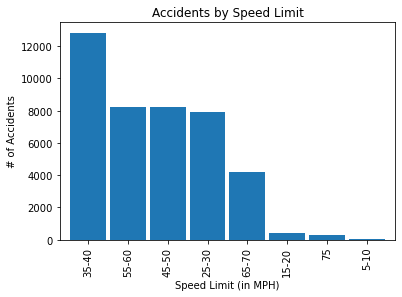

In [16]:
mph_plt = mph_inj['Total'][0:8].sort_values(ascending=False)
mph_plt.plot(kind='bar', width=0.90)
plt.title('Accidents by Speed Limit')
plt.xlabel('Speed Limit (in MPH)')
plt.ylabel('# of Accidents')
plt.show()

***Note.*** The 35-40 mph speed limit shows the highest prevalence of accidents.

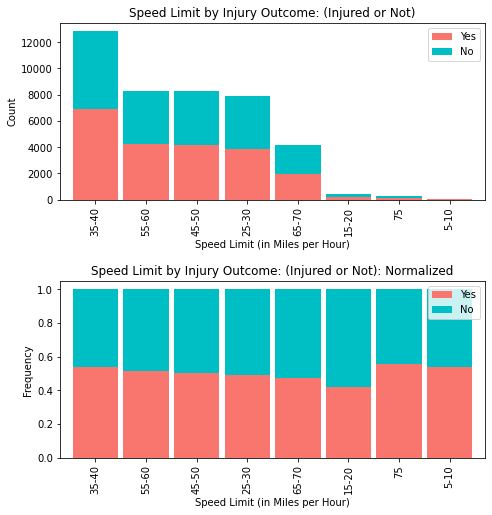

In [17]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
fig.tight_layout(pad=6)

mph_plt2 = mph_inj[['Yes', 'No']][0:8].sort_values(by=['Yes'], 
                                                   ascending=False)
mph_plt2.plot(kind='bar', stacked=True, 
              ax=ax1, color = ['#F8766D', '#00BFC4'], width = 0.90)
ax1.set_title('Speed Limit by Injury Outcome: (Injured or Not)')
ax1.set_xlabel('Speed Limit (in Miles per Hour)')
ax1.set_ylabel('Count')

# normalize the plot and plot it
mph_plt_norm = mph_plt2.div(mph_plt2.sum(1), axis = 0)
mph_plt_norm.plot(kind='bar', stacked=True, 
                  ax=ax2,color = ['#F8766D', '#00BFC4'], width = 0.90)
ax2.set_title('Speed Limit by Injury Outcome: (Injured or Not): Normalized')
ax2.set_xlabel('Speed Limit (in Miles per Hour)')
ax2.set_ylabel('Frequency')

plt.show()

From the speed limit group bar graph overlayed with “injured” and “non-injured” accident results, it is
evident that the speed limit of 35-40 mph has a greater incidence of injuries (more than any other speed
limit group).  

While the strength of this graph is in its depiction of the overall distribution (providing us with injuries
vs. non-injuries in each speed related accident), it does little to provide a comparison of the frequency
(incidence rate) of injuries among the speed limit groups.

Normalizing the speed limit groups by our target (INJURY) assuages this analysis in such capacity. From
here, it is easier to see that speed limits of 5-10 miles per hour, and 35-40 miles per hour, respectively had
roughly 50% injury rates, whereas (notably), 75 miles per hour exhibited the highest injury rate of all.

***Note.*** There are precisely 12,845 accidents that occurred between the 35-40 mph speed limit. 6,873 (or
53.51%) of them resulted in injuries.
Now, let us plot the histogram distributions from each respective variable of the dataset. Figure 3 below visually illustrates these distributions.

### Histogram Distributions

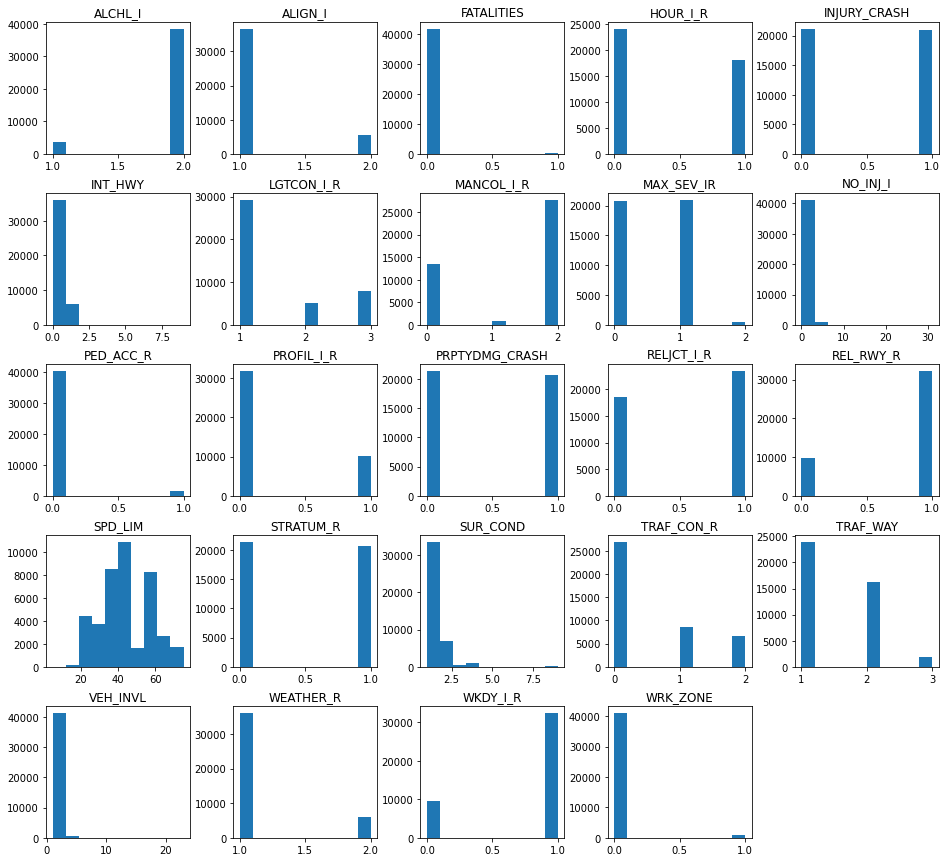

In [18]:
# checking for degenerate distributions
accidents.hist(grid=False, figsize=(16,15))
                            
plt.show()

23 out of the original 24 variables are categorical, and from the histograms presented herein it is possible
to uncover degenerate distributions with relative ease, as one category represents higher values over another.
However, we look to the speed limit as the sole quantitative predictor which yields a positively skewed distribution. The following summary statistics corroborate this claim since the mean of 44 is greater than
the median of 40.

In [19]:
summ_stats = pd.DataFrame(accidents['SPD_LIM'].describe()).T
summ_stats

count       mean        std  min   25%   50%   75%   max
SPD_LIM  42183.0  43.547875  12.948396  5.0  35.0  40.0  55.0  75.0

In [20]:
print("\033[1m"+'Accidents by Speed Limit Summary'+"\033[1m")
def accident_stats_by_mph():
    pd.options.display.float_format = '{:,.2f}'.format
    new2 = accidents.groupby('MPH Range')['SPD_LIM']\
    .agg(["mean", "median", "std", "min", "max"])
    new2.loc['Total'] = new2.sum(numeric_only=True, axis=0)
    column_rename = {'mean': 'Mean', 'median': 'Median',
                     'std': 'Standard Deviation',\
                     'min':'Minimum','max': 'Maximum'}
    dfsummary = new2.rename(columns = column_rename)
    return dfsummary
acc_stats_mph = accident_stats_by_mph()
accident_stats_by_mph()

Accidents by Speed Limit Summary


Mean  Median  Standard Deviation  Minimum  Maximum
MPH Range                                                     
15-20      17.89   20.00                2.47    15.00    20.00
25-30      27.35   25.00                2.50    25.00    30.00
35-40      36.68   35.00                2.36    35.00    40.00
45-50      46.01   45.00                2.01    45.00    50.00
5-10        8.93   10.00                2.09     5.00    10.00
55-60      56.00   55.00                2.00    55.00    60.00
65-70      66.74   65.00                2.38    65.00    70.00
75         75.00   75.00                0.00    75.00    75.00
Total     334.60  330.00               15.81   320.00   355.00

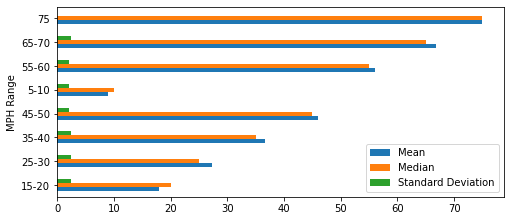

In [21]:
acc_stats_mph.iloc[:, 0:3][0:8].plot.barh(figsize=(8,3.5))
plt.show()

### Selected Boxplot Distribution - Speed Limit

Boxplot Distribution


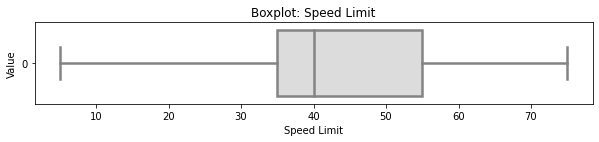

The first quartile is 35.0. 
The third quartile is 55.0. 
The IQR is 20.0.
The mean is 43.55. 
The standard deviation is 12.95. 
The median is 40.0. 


In [22]:
# selected boxplot distributions
print("\033[1m"+'Boxplot Distribution'+"\033[1m")

# Boxplot of age as one way of showing distribution
fig = plt.figure(figsize = (10,1.5))
plt.title ('Boxplot: Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Value')
sns.boxplot(data=accidents['SPD_LIM'], 
            palette="coolwarm", orient='h', 
            linewidth=2.5)
plt.show()

IQR = summ_stats['75%'][0] - summ_stats['25%'][0]

print('The first quartile is %s. '%summ_stats['25%'][0])
print('The third quartile is %s. '%summ_stats['75%'][0])
print('The IQR is %s.'%round(IQR,2))
print('The mean is %s. '%round(summ_stats['mean'][0],2))
print('The standard deviation is %s. '%round(summ_stats['std'][0],2))
print('The median is %s. '%round(summ_stats['50%'][0],2))

\
Whereas no outliers are present in the speed limit variable, there exists some skewness where the mean (43.55) is slightly greater than the median (40.00). Whereas typically a Box-Cox transformation could mitigate against skewness by transforming the variable(s) of interest, we will not be making such transformation to avoid misrepresenting the speed limit variable.


### Correlation Matrix

Accidents Data: Correlation Matrix


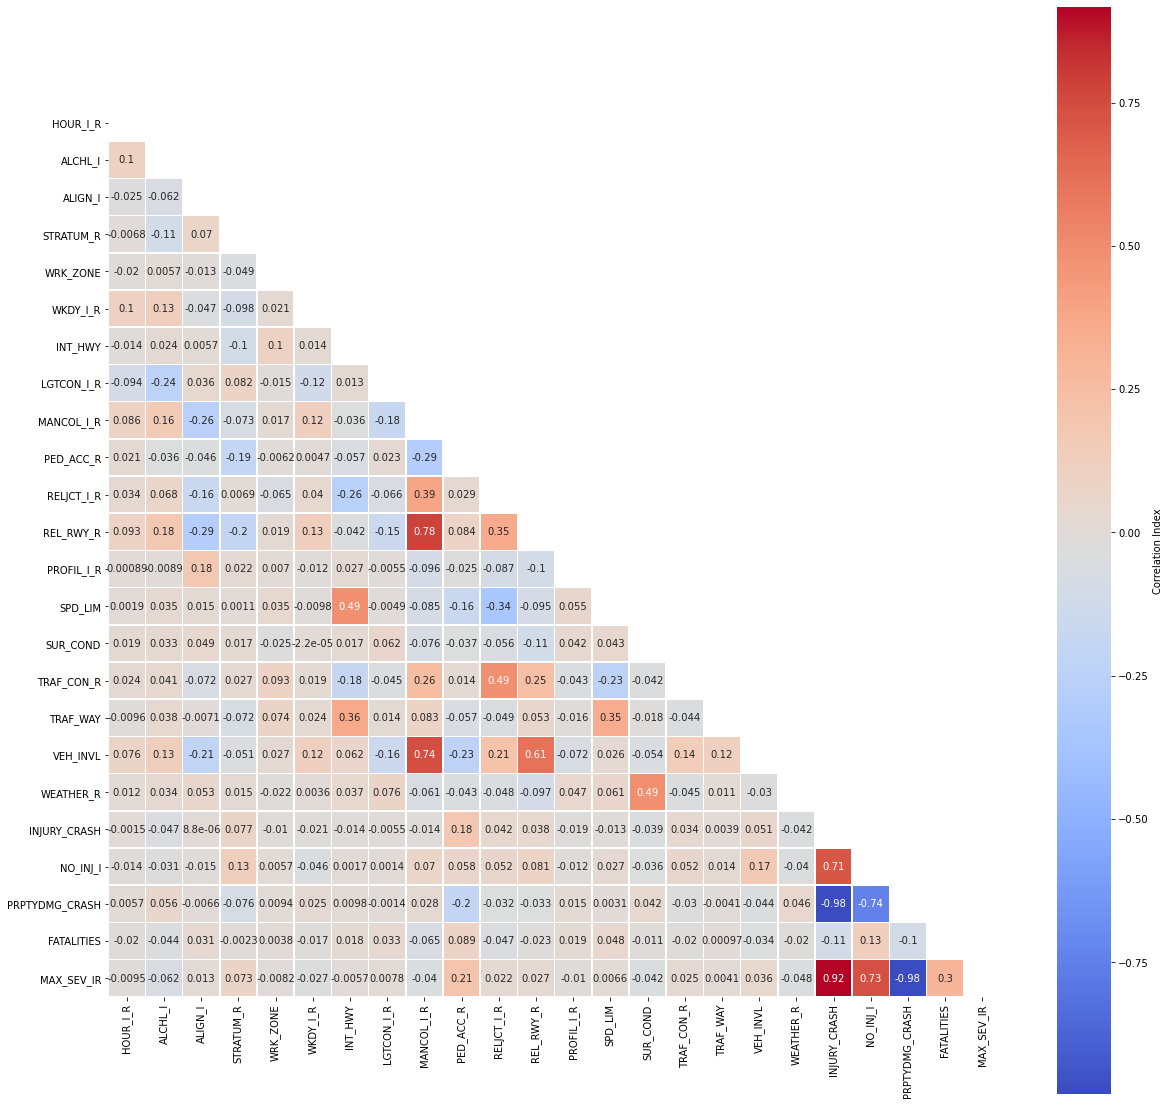

In [23]:
# correlation matrix title
print("\033[1m"+'Accidents Data: Correlation Matrix'+"\033[1m")

# assign correlation function to new variable
corr = accidents.corr()
matrix = np.triu(corr) # for triangular matrix
plt.figure(figsize=(20,20))
# parse corr variable intro triangular matrix
sns.heatmap(accidents.corr(method='pearson'), 
            annot=True, linewidths=.5, 
            cmap="coolwarm", mask=matrix,
            square = True, 
            cbar_kws={'label': 'Correlation Index'})
plt.show()

### Multicollinearity

Let us narrow our focus by removing highly correlated predictors and passing the rest into a new dataframe.

In [24]:
cor_matrix = accidents.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),
                                     k=1).astype(np.bool))

to_drop = [column for column in upper_tri.columns if 
           any(upper_tri[column] > 0.75)]
print('These are the columns we should drop: %s'%to_drop)

These are the columns we should drop: ['REL_RWY_R', 'PRPTYDMG_CRASH', 'MAX_SEV_IR']


In [25]:
accidents_1 = accidents.drop(columns=['MPH Range','NO_INJ_I','INJURY', 
                                      'INJURY_CRASH', 'MANCOL_I_R', 
                                      'FATALITIES', 'INT_HWY', 'TRAF_WAY'])
accidents_1 = accidents_1.drop(to_drop, axis=1)
print(accidents_1.dtypes, '\n')
print('Number of Rows:', accidents_1.shape[0])
print('Number of Columns:', accidents_1.shape[1])

HOUR_I_R      int64
ALCHL_I       int64
ALIGN_I       int64
STRATUM_R     int64
WRK_ZONE      int64
WKDY_I_R      int64
LGTCON_I_R    int64
PED_ACC_R     int64
RELJCT_I_R    int64
PROFIL_I_R    int64
SPD_LIM       int64
SUR_COND      int64
TRAF_CON_R    int64
VEH_INVL      int64
WEATHER_R     int64
dtype: object 

Number of Rows: 42183
Number of Columns: 15


## Additional Pre-Processing

`MPH_Range` was created strictly for exploratory data analysis purposes. The `INJURY` column was based off the maximum injury severity column `MAX_SEV_IR,` so, we will binarize the `INJURY` column into a new `Injured` column in lieu of the prior two.

In [26]:
accidents['Injured'] = accidents['INJURY'].map({'yes':1, 'no':0})

Furthermore, we must remove the `REL_RWY_R,` `PRPTYDMG_CRASH,` and `MAX_SEV_IR` columns from the dataframe resulting from the inherent between-predictor and predictor-target relationships, respectively. However, there are still a few predictors that warrant subsequent omission. Number of injuries (`NO_INJ_I`) and fatalities (`FATALATIES`) are inherently and intrinsically related to the outcome by virtue of their meaning. Therefore, in order to avoid overfitting the model, we remove them.

In [27]:
accidents_1 = accidents.drop(columns=['MPH Range','NO_INJ_I','INJURY',
                                      'INJURY_CRASH', 'MANCOL_I_R',
                                      'FATALITIES'])
accidents_1 = accidents_1.drop(to_drop, axis=1)
print(accidents_1.dtypes, '\n')
print('Number of Rows:', accidents_1.shape[0])
print('Number of Columns:', accidents_1.shape[1])

HOUR_I_R      int64
ALCHL_I       int64
ALIGN_I       int64
STRATUM_R     int64
WRK_ZONE      int64
WKDY_I_R      int64
INT_HWY       int64
LGTCON_I_R    int64
PED_ACC_R     int64
RELJCT_I_R    int64
PROFIL_I_R    int64
SPD_LIM       int64
SUR_COND      int64
TRAF_CON_R    int64
TRAF_WAY      int64
VEH_INVL      int64
WEATHER_R     int64
Injured       int64
dtype: object 

Number of Rows: 42183
Number of Columns: 18


## Checking for Statistical Significance Via Baseline Model

The logistic regression model is introduced as a baseline because establishing impact of coefficients on each independent feature can be carried with relative ease. Moreover, it is possible to gauge statistical significance from the reported *p*-values of the summary output table below.

**Generalized Linear Model - Logistic Regression Baseline**

$$y = \beta_0 + \beta_1x_1 +\beta_2x_2 +\cdots+\beta_px_p + \varepsilon$$

**Logistic Regression - Parametric Form**

$$ p(y) = \frac{\text{exp}(\beta_0+\beta_1x_1+\beta_2x_2+\cdot\cdot\cdot+\beta_px_p)}{1+\text{exp}(\beta_0+\beta_1x_1+\beta_2x_2+\cdot\cdot\cdot+\beta_px_p)}  + \varepsilon $$

**Logistic Regression - Descriptive Form**

$$\hat{p}(y) = \frac{\text{exp}(b_0+b_1x_1+b_2x_2+\cdot\cdot\cdot+b_px_p)}{1+\text{exp}(b_0+b_1x_1+b_2x_2+\cdot\cdot\cdot+b_px_p)}$$

In [28]:
X = accidents_1.drop(columns=['Injured'])
X = sm.add_constant(X)
y = pd.DataFrame(accidents_1[['Injured']])
log_results = sm.Logit(y,X, random_state=222).fit()
log_results.summary()

Optimization terminated successfully.
         Current function value: 0.650360
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Injured   No. Observations:                42183
Model:                          Logit   Df Residuals:                    42165
Method:                           MLE   Df Model:                           17
Date:                Tue, 01 Mar 2022   Pseudo R-squ.:                 0.06152
Time:                        22:39:49   Log-Likelihood:                -27434.
converged:                       True   LL-Null:                       -29233.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6001      0.109     -5.510      0.000      -0.814      -0.387
HOUR_I_R      -0.0568      0.021     -2.740      0.006      -0.097      -0.016
ALCHL_I       -0.3613      0.038     -9.428      0.000      -0.436      -0.286
ALIGN_I        0.2351      0.031      7.535      0.000       0.174       0.296
STRATUM_R      0.5008      0.021     24.079      0.000       0.460       0.542
WRK_ZONE      -0.0956      0.069     -1.379      0.168      -0.231       0.040
WKDY_I_R      -0.1037      0.025     -4.207      0.000      -0.152      -0.055
INT_HWY       -0.0227      0.029     -0.786      0.432      -0.079       0.034
LGTCON_I_R    -0.0184      0.014     -1.364      0.173      -0.045       0.008
PED_ACC_R      5.4058      0.260     20.755      0.000       4.895       5.916
RELJCT_I_R     0.0553      0.025      2.169      0.030       0.005       0.105
PROFIL_I_R    -0.0413      0.024     -1.719      0.086      -0.088       0.006
SPD_LIM        0.0080      0.001      8.260      0.000       0.006       0.010
SUR_COND      -0.0384      0.015     -2.558      0.011      -0.068      -0.009
TRAF_CON_R     0.0370      0.016      2.345      0.019       0.006       0.068
TRAF_WAY       0.0060      0.019      0.310      0.757      -0.032       0.044
VEH_INVL       0.3755      0.017     21.759      0.000       0.342       0.409
WEATHER_R     -0.1611      0.033     -4.851      0.000      -0.226      -0.096
==============================================================================
"""

From the summary output table, we observe that `WRK_ZONE`, `INT_HWY,` `LGTCON_I_R,` and `TRAF_WAY` have *p*-values of 0.168, 0.173, and 0.757, respectively, thereby ruling out statistical significance where α = 0.05. We will thus remove them from the refined dataset.

In [29]:
accidents1 = accidents_1.drop(columns=['WRK_ZONE','INT_HWY',
                          'LGTCON_I_R', 'TRAF_WAY'])

## Train_Test_Split

In [30]:
X = accidents_1.drop(columns=['Injured'])
y = pd.DataFrame(accidents_1['Injured'])

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.20, random_state=42)

# confirming train_test_split proportions
print('training size:', round(len(X_train)/len(X),2))
print('test size:', round(len(X_test)/len(X),2))

training size: 0.8
test size: 0.2


In [31]:
# confirm dimensions (size of newly partioned data)
print('Training:', len(X_train))
print('Test:', len(X_test))
print('Total:',   len(X_train)
                + len(X_test))

Training: 33746
Test: 8437
Total: 42183


## Model Building Strategies

### Logistic Regression

Untuned Logistic Regression Model
Accuracy Score
0.6019912291098731
Classification Report 
               precision    recall  f1-score   support

           0       0.59      0.63      0.61      4200
           1       0.61      0.57      0.59      4237

    accuracy                           0.60      8437
   macro avg       0.60      0.60      0.60      8437
weighted avg       0.60      0.60      0.60      8437

Tuned Logistic Regression Model
Accuracy Score
0.6035320611591798
Classification Report 
               precision    recall  f1-score   support

           0       0.60      0.63      0.61      4200
           1       0.61      0.58      0.59      4237

    accuracy                           0.60      8437
   macro avg       0.60      0.60      0.60      8437
weighted avg       0.60      0.60      0.60      8437



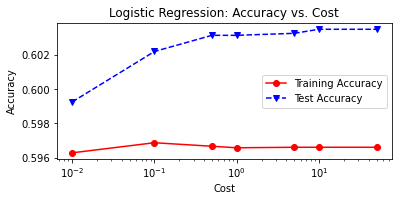

In [32]:
# Un-Tuned Logistic Regression Model
logit_reg = LogisticRegression(random_state=222) 
logit_reg.fit(X_train, y_train)

# Predict on test set
logit_reg_pred1 = logit_reg.predict(X_test)

# accuracy and classification report
print('Untuned Logistic Regression Model')
print('Accuracy Score')
print(accuracy_score(y_test, logit_reg_pred1))
print('Classification Report \n', 
       classification_report(y_test, logit_reg_pred1))

# Tuned Logistic Regression Model
C = [0.01, 0.1, 0.5, 1, 5, 10, 50]
LRtrainAcc = []
LRtestAcc = []
for param in C:
    tuned_lr = LogisticRegression(solver = 'saga',
                                  C = param, 
                                  max_iter = 200,
                                  n_jobs = -1,
                                  random_state = 222)
    tuned_lr.fit(X_train, y_train)
    # Predict on train set
    tuned_lr_pred_train = tuned_lr.predict(X_train)
    # Predict on test set
    tuned_lr1 = tuned_lr.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, tuned_lr_pred_train))
    LRtestAcc.append(accuracy_score(y_test, tuned_lr1))
    
# accuracy and classification report
print('Tuned Logistic Regression Model')
print('Accuracy Score')
print(accuracy_score(y_test, tuned_lr1))
print('Classification Report \n', 
       classification_report(y_test, tuned_lr1))

# plot cost by accuracy
fig, ax = plt.subplots(figsize=(6,2.5))
ax.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax.legend(['Training Accuracy','Test Accuracy'])
plt.title('Logistic Regression: Accuracy vs. Cost')
ax.set_xlabel('Cost'); ax.set_xscale('log')
ax.set_ylabel('Accuracy'); plt.show()

### Decision Trees

Before we print the classification report for the un-tuned decision tree, let us establish the optimal maximum depth hyperparameter by varying it in a for-loop as follows:

Depth =  3 	 Test Accuracy = 0.60 	     Training Accuracy = 0.59
Depth =  4 	 Test Accuracy = 0.60 	     Training Accuracy = 0.60
Depth =  5 	 Test Accuracy = 0.60 	     Training Accuracy = 0.60
Depth =  6 	 Test Accuracy = 0.60 	     Training Accuracy = 0.60
Depth =  7 	 Test Accuracy = 0.60 	     Training Accuracy = 0.61
Depth =  8 	 Test Accuracy = 0.60 	     Training Accuracy = 0.61
Depth =  9 	 Test Accuracy = 0.60 	     Training Accuracy = 0.62
Depth = 10 	 Test Accuracy = 0.59 	     Training Accuracy = 0.62
Depth = 11 	 Test Accuracy = 0.60 	     Training Accuracy = 0.63
Depth = 12 	 Test Accuracy = 0.60 	     Training Accuracy = 0.64
Depth = 13 	 Test Accuracy = 0.59 	     Training Accuracy = 0.66
Depth = 14 	 Test Accuracy = 0.59 	     Training Accuracy = 0.67


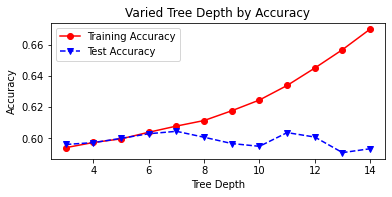

In [33]:
# Vary the decision tree depth in a loop, 
# increasing depth from 3 to 14. 

accuracy_depth=[]

for depth in range(3,15):

    varied_tree = DecisionTreeClassifier(max_depth = depth, 
                                         random_state = 222)
    varied_tree=varied_tree.fit(X_train,y_train)
    tree_test_pred = varied_tree.predict(X_test)
    tree_train_pred = varied_tree.predict(X_train)
    accuracy_depth.append({'depth':depth,
                           'test_accuracy':accuracy_score\
                           (y_test,tree_test_pred),
                           'train_accuracy':accuracy_score\
                           (y_train,tree_train_pred)
                          })
    
    print('Depth = %2.0f \t Test Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (depth,accuracy_score\
                                (y_test, tree_test_pred),
                                 accuracy_score(y_train, 
                                 tree_train_pred)))

abd_df = pd.DataFrame(accuracy_depth)
abd_df.index = abd_df['depth']

# plot tree depth by accuracy
fig, ax=plt.subplots(figsize=(6,2.5))

ax.plot(abd_df.depth,abd_df.train_accuracy,
        'ro-',label='Training Accuracy')
ax.plot(abd_df.depth,abd_df.test_accuracy,
        'bv--',label='Test Accuracy')

plt.title('Varied Tree Depth by Accuracy')
ax.set_xlabel('Tree Depth')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

The optimal maximum depth exists where test and training accuracy are both highest (60% and 64%, respectively). This is where depth is equal to 12. Now we can print the classification reports for both the un-tuned and tuned models, noting some improvement in performance.

In [34]:
# Untuned Decision Tree Classifier
untuned_tree = DecisionTreeClassifier(random_state=222)
untuned_tree = untuned_tree.fit(X_train, y_train)

# Predict on test set
untuned_tree1 = untuned_tree.predict(X_test)

# accuracy and classification report
print('Untuned Decision Tree Classifier')
print('Accuracy Score')
print(accuracy_score(y_test, untuned_tree1))
print('Classification Report \n', 
       classification_report(y_test, untuned_tree1))

# Tuned Decision Tree Classifier
tuned_tree = DecisionTreeClassifier(max_depth = 12,
                                    random_state=222)
tuned_tree = tuned_tree.fit(X_train, y_train)
# Predict on test set
tuned_tree1 = tuned_tree.predict(X_test)

# accuracy and classification report
print('Tuned Decision Tree Classifier')
print('Accuracy Score')
print(accuracy_score(y_test, tuned_tree1))
print('Classification Report \n', 
       classification_report(y_test, tuned_tree1))

Untuned Decision Tree Classifier
Accuracy Score
0.5661965153490577
Classification Report 
               precision    recall  f1-score   support

           0       0.56      0.61      0.58      4200
           1       0.58      0.52      0.55      4237

    accuracy                           0.57      8437
   macro avg       0.57      0.57      0.57      8437
weighted avg       0.57      0.57      0.57      8437

Tuned Decision Tree Classifier
Accuracy Score
0.6008059736873296
Classification Report 
               precision    recall  f1-score   support

           0       0.59      0.63      0.61      4200
           1       0.61      0.57      0.59      4237

    accuracy                           0.60      8437
   macro avg       0.60      0.60      0.60      8437
weighted avg       0.60      0.60      0.60      8437



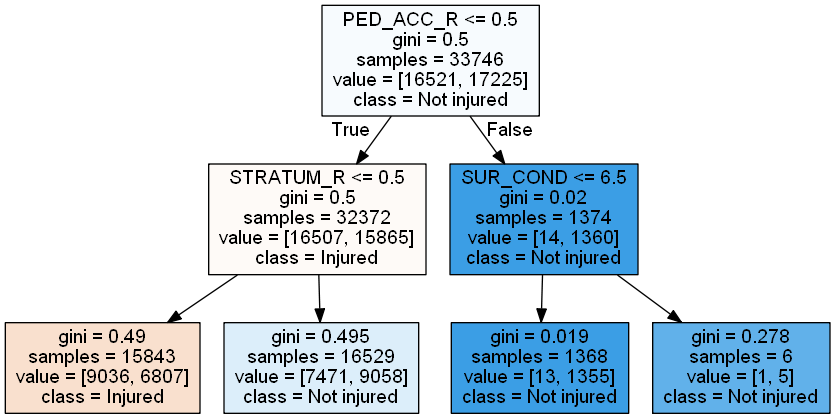

In [35]:
cn = ['Injured', 'Not injured']
reduced_tree = DecisionTreeClassifier(max_depth = 2,
                                      random_state=222)
reduced_tree = reduced_tree.fit(X_train, y_train)
import pydotplus
from IPython.display import Image
# plot pruned tree at a max depth of 2
dot_data = export_graphviz(reduced_tree,
feature_names = X_train.columns,
class_names = cn,
filled = True, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Random Forest Classifier

Max Depth =  1 	 Test Accuracy = 0.56 	     Training Accuracy = 0.56
Max Depth =  2 	 Test Accuracy = 0.61 	     Training Accuracy = 0.60
Max Depth =  3 	 Test Accuracy = 0.61 	     Training Accuracy = 0.60
Max Depth =  4 	 Test Accuracy = 0.61 	     Training Accuracy = 0.60
Max Depth =  5 	 Test Accuracy = 0.61 	     Training Accuracy = 0.60
Max Depth =  6 	 Test Accuracy = 0.61 	     Training Accuracy = 0.61
Max Depth =  7 	 Test Accuracy = 0.61 	     Training Accuracy = 0.61
Max Depth =  8 	 Test Accuracy = 0.61 	     Training Accuracy = 0.62
Max Depth =  9 	 Test Accuracy = 0.61 	     Training Accuracy = 0.63
Max Depth = 10 	 Test Accuracy = 0.61 	     Training Accuracy = 0.64
Max Depth = 11 	 Test Accuracy = 0.61 	     Training Accuracy = 0.65
Max Depth = 12 	 Test Accuracy = 0.61 	     Training Accuracy = 0.67
Max Depth = 13 	 Test Accuracy = 0.60 	     Training Accuracy = 0.69
Max Depth = 14 	 Test Accuracy = 0.60 	     Training Accuracy = 0.71


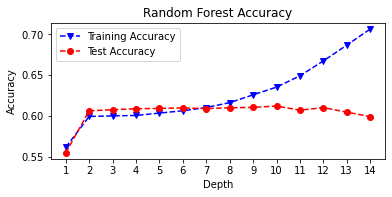

In [36]:
# Random Forest Tuning
rf_train_accuracy = []
rf_test_accuracy = []
for n in range(1, 15):
    rf = RandomForestClassifier(max_depth = n, 
                                random_state=222)
    rf = rf.fit(X_train, y_train)
    rf_pred_train = rf.predict(X_train)
    rf_pred_test = rf.predict(X_test)
    rf_train_accuracy.append(accuracy_score(y_train, 
                                            rf_pred_train))
    rf_test_accuracy.append(accuracy_score(y_test, 
                                            rf_pred_test))
    print('Max Depth = %2.0f \t Test Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (n, accuracy_score(y_test,
                                                  rf_pred_test),
                               accuracy_score(y_train,
                                              rf_pred_train)))
max_depth = list(range(1, 15))
fig, plt.subplots(figsize=(6,2.5))
plt.plot(max_depth, rf_train_accuracy, 'bv--', 
         label='Training Accuracy')
plt.plot(max_depth, rf_test_accuracy, 'ro--', 
         label='Test Accuracy')
plt.title('Random Forest Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth)
plt.legend()
plt.show()

In [37]:
# Untuned Random Forest
untuned_rf = RandomForestClassifier(random_state=222)
untuned_rf = untuned_rf.fit(X_train, y_train)

# Predict on test set
untuned_rf1 = untuned_rf.predict(X_test)

# accuracy and classification report
print('Untuned Random Forest Model')
print('Accuracy Score')
print(accuracy_score(y_test, untuned_rf1))
print('Classification Report \n', 
       classification_report(y_test, untuned_rf1))

# Tuned Random Forest
tuned_rf = RandomForestClassifier(random_state=222,
                                  max_depth = 12)
tuned_rf = tuned_rf.fit(X_train, y_train)

# Predict on test set
tuned_rf1 = tuned_rf.predict(X_test)

# accuracy and classification report
print('Tuned Random Forest Model')
print('Accuracy Score')
print(accuracy_score(y_test, tuned_rf1))
print('Classification Report \n', 
       classification_report(y_test, tuned_rf1))

Untuned Random Forest Model
Accuracy Score
0.5749674054758801
Classification Report 
               precision    recall  f1-score   support

           0       0.57      0.58      0.58      4200
           1       0.58      0.57      0.57      4237

    accuracy                           0.57      8437
   macro avg       0.58      0.57      0.57      8437
weighted avg       0.58      0.57      0.57      8437

Tuned Random Forest Model
Accuracy Score
0.6104065426099324
Classification Report 
               precision    recall  f1-score   support

           0       0.60      0.63      0.62      4200
           1       0.62      0.59      0.60      4237

    accuracy                           0.61      8437
   macro avg       0.61      0.61      0.61      8437
weighted avg       0.61      0.61      0.61      8437



## Model Evaluation

### Confusion Matrices

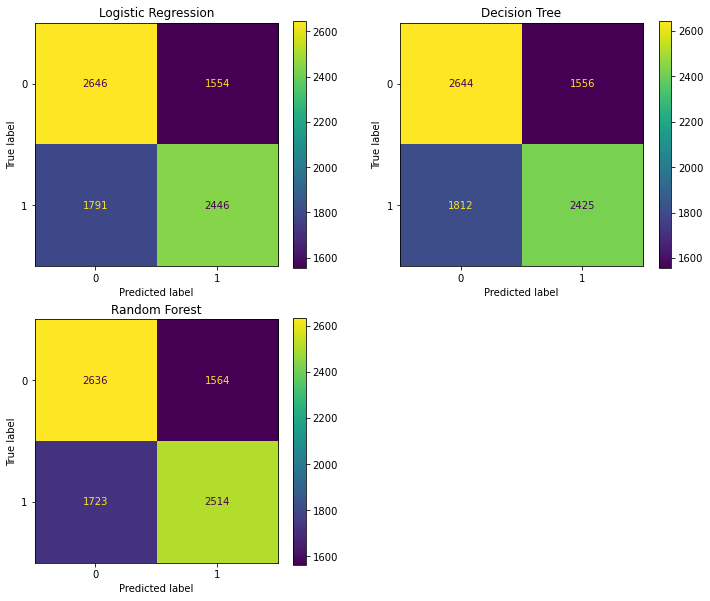

In [38]:
fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

# logistic regression confusion matrix
plot_confusion_matrix(tuned_lr, X_test, y_test, ax=ax1)
ax1.set_title('Logistic Regression')

# Decision tree confusion matrix
plot_confusion_matrix(tuned_tree, X_test, y_test, ax=ax2)
ax2.set_title('Decision Tree')


# random forest confusion matrix
plot_confusion_matrix(tuned_rf, X_test, y_test, ax=ax3)
ax3.set_title('Random Forest')
plt.show()

### ROC Curves

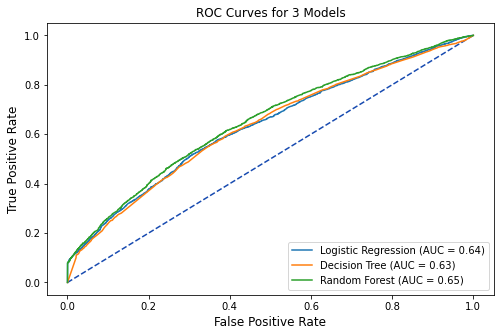

In [39]:
# extract predicted probabilities from models
tuned_lr_pred = tuned_lr.predict_proba(X_test)[:, 1]
tuned_tree_pred = tuned_tree.predict_proba(X_test)[:, 1]
tuned_rf_pred = tuned_rf.predict_proba(X_test)[:, 1]

# plot all of the roc curves on one graph
tuned_lr_roc = metrics.roc_curve(y_test,tuned_lr_pred)
fpr,tpr,thresholds = metrics.roc_curve(y_test,tuned_lr_pred)
tuned_lr_auc = metrics.auc(fpr, tpr)
tuned_lr_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc = tuned_lr_auc, 
estimator_name = 'Logistic Regression')

tuned_tree_roc = metrics.roc_curve(y_test,tuned_tree_pred)
fpr,tpr,thresholds = metrics.roc_curve(y_test,tuned_tree_pred)
tuned_tree_auc = metrics.auc(fpr, tpr)
tuned_tree_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,
roc_auc=tuned_tree_auc, 
estimator_name = 'Decision Tree')

tuned_rf1_roc = metrics.roc_curve(y_test, tuned_rf_pred)
fpr,tpr,thresholds = metrics.roc_curve(y_test,tuned_rf_pred)
tuned_rf1_auc = metrics.auc(fpr, tpr)
tuned_rf1_plot = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr, 
roc_auc=tuned_rf1_auc, 
estimator_name = 'Random Forest')

# plot set up
fig, ax = plt.subplots(figsize=(8,5))
plt.title('ROC Curves for 3 Models',fontsize=12)
plt.plot([0, 1], [0, 1], linestyle = '--', 
         color = '#174ab0')
plt.xlabel('',fontsize=12) 
plt.ylabel('',fontsize=12) 

# Model ROC Plots Defined above
tuned_lr_plot.plot(ax)
tuned_tree_plot.plot(ax)
tuned_rf1_plot.plot(ax)
plt.show()

### Performance Metrics 

In [40]:
# Logistic Regression Performance Metrics
report1 = classification_report(y_test,tuned_lr1,
output_dict=True)
accuracy1 = round(report1['accuracy'],4)
precision1 = round(report1['1']['precision'],4)
recall1 = round(report1['1']['recall'],4)
fl_score1 = round(report1['1']['f1-score'],4)

# Decision Tree Performance Metrics                       
report2 = classification_report(y_test,tuned_tree1,
output_dict=True)
accuracy2 = round(report2['accuracy'],4)
precision2 = round(report2['1']['precision'],4)
recall2 = round(report2['1']['recall'],4)
fl_score2 = round(report2['1']['f1-score'],4)

# Random Forest Performance Metrics
report3 = classification_report(y_test,tuned_rf1,
output_dict=True)                
accuracy3 = round(report3['accuracy'],4)
precision3 = round(report3['1']['precision'],4)
recall3 = round(report3['1']['recall'],4)
fl_score3 = round(report3['1']['f1-score'],4)         

In [41]:
table1 = PrettyTable()
table1.field_names = ['Model', 'Test Accuracy', 
                      'Precision', 'Recall', 
                      'F1-score']
table1.add_row(['Logistic Regression', accuracy1, 
                precision1, recall1, fl_score1])
table1.add_row(['Decision Tree', accuracy2, 
                precision2, recall2, fl_score2])
table1.add_row(['Random Forest', accuracy3, 
                precision3, recall3, fl_score3])
print(table1)

+---------------------+---------------+-----------+--------+----------+
|        Model        | Test Accuracy | Precision | Recall | F1-score |
+---------------------+---------------+-----------+--------+----------+
| Logistic Regression |     0.6035    |   0.6115  | 0.5773 |  0.5939  |
|    Decision Tree    |     0.6008    |   0.6091  | 0.5723 |  0.5902  |
|    Random Forest    |     0.6104    |   0.6165  | 0.5933 |  0.6047  |
+---------------------+---------------+-----------+--------+----------+


In [42]:
# Mean-Squared Errors
mse1 = round(mean_squared_error(y_test, tuned_lr1),4)
mse2 = round(mean_squared_error(y_test, tuned_tree1),4)
mse3 = round(mean_squared_error(y_test, tuned_rf1),4)

table2 = PrettyTable()
table2.field_names = ['Model', 'AUC', 'MSE']
table2.add_row(['Logistic Regression', 
                 round(tuned_lr_auc,4), mse1])
table2.add_row(['Decision Tree', 
                 round(tuned_tree_auc,4), mse2])
table2.add_row(['Random Forest', 
                 round(tuned_rf1_auc,4), mse3])
print(table2)

+---------------------+--------+--------+
|        Model        |  AUC   |  MSE   |
+---------------------+--------+--------+
| Logistic Regression | 0.6357 | 0.3965 |
|    Decision Tree    | 0.6326 | 0.3992 |
|    Random Forest    | 0.653  | 0.3896 |
+---------------------+--------+--------+


**Reference**  

Shmueli, G., Bruce, P. C., Gedeck, P., & Patel, N. R. (2020). *Data mining for business  
analytics: Concepts, techniques and applications in Python.* John Wiley & Sons, Inc.